#### Project - 1 Simple linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv("C:/Users/anuja/OneDrive/Documents/Delivery time.csv")
print(data)

    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


In [3]:
data=data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)

In [4]:
data.shape

(21, 2)

In [5]:
data.tail()

,Delivery_Time,Sorting_Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [6]:
data.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [8]:
data.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [9]:
data.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [10]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [11]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Text(0.5, 1.0, "Histogram of 'Sorting Time'")

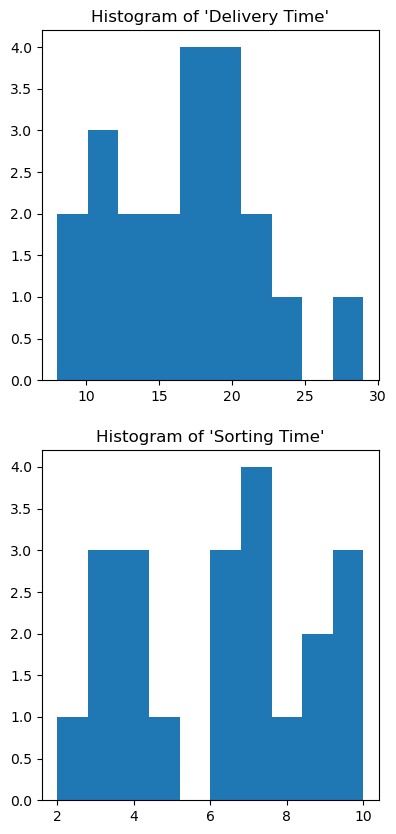

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(data['Delivery_Time'], density=False)
plt.title("Histogram of 'Delivery Time'")
plt.subplot(2,4,5)
plt.hist(data['Sorting_Time'], density=False)
plt.title("Histogram of 'Sorting Time'")

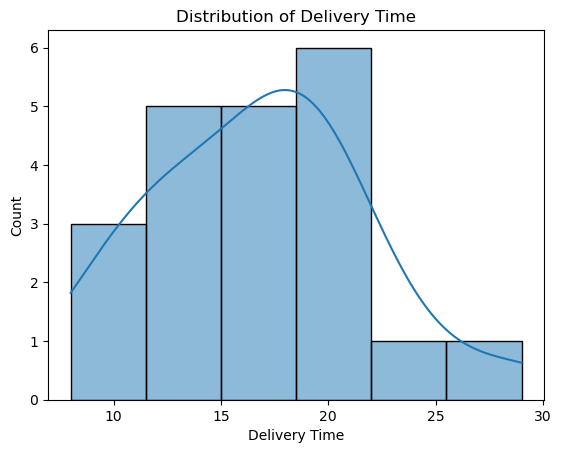

In [13]:
# Visualize the distribution of the target variable
sns.histplot(data['Delivery_Time'], kde=True)
plt.xlabel('Delivery Time')
plt.ylabel('Count')
plt.title('Distribution of Delivery Time')
plt.show()

Text(0.5, 1.0, "box plot of 'Sorting Time'")

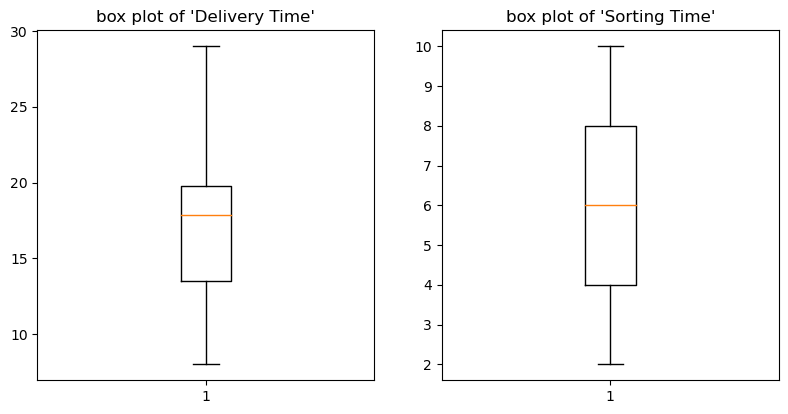

In [14]:
## Checking the outliers---
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.boxplot(data['Delivery_Time'])
plt.title("box plot of 'Delivery Time'")
plt.subplot(2,4,2)
plt.boxplot(data['Sorting_Time'])
plt.title("box plot of 'Sorting Time'")

There is no Outlier in the dataset

Text(0.5, 1.0, 'Scatter plot')

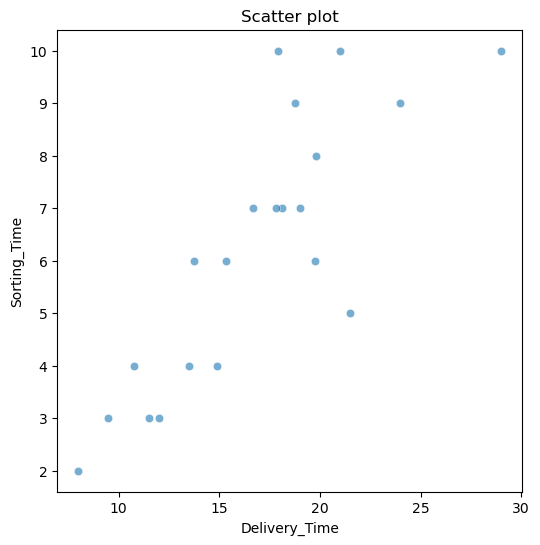

In [15]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data, x="Delivery_Time", y="Sorting_Time", alpha=0.6)
plt.title("Scatter plot")

Text(0.5, 1.0, 'Line plot of Delivery Time, Sorting Time')

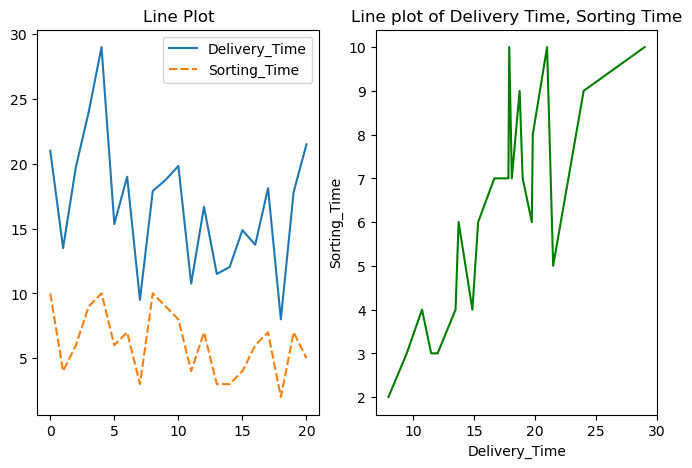

In [16]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.lineplot(data=data)
plt.title('Line Plot')
plt.subplot(1,2,2)
sns.lineplot(data=data, x="Delivery_Time", y="Sorting_Time" ,estimator="sum", color="g")
plt.title("Line plot of Delivery Time, Sorting Time")

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

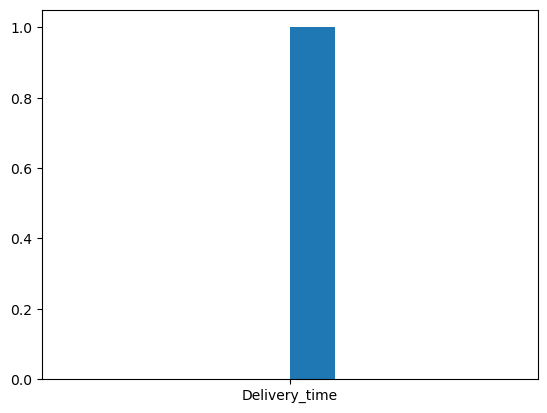

In [17]:
plt.hist("Delivery_time")

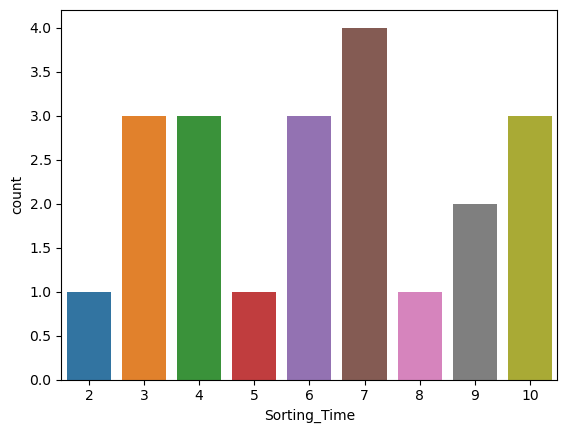

In [18]:
sns.countplot(x= 'Sorting_Time' ,data=data)
plt.show()

<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

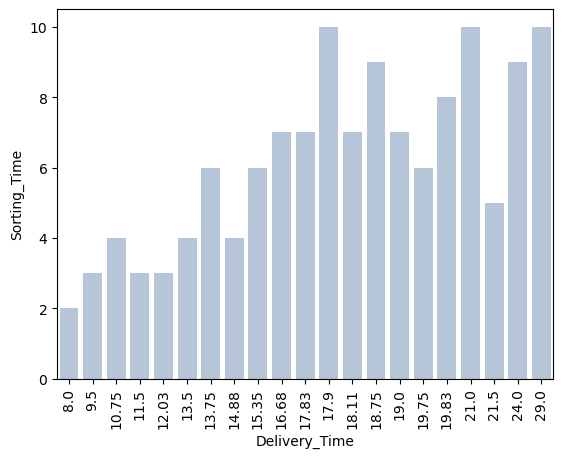

In [19]:
plt.xticks(rotation=90,fontsize="medium")
sns.barplot(x="Delivery_Time",y="Sorting_Time",data=data,color="lightsteelblue")

<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

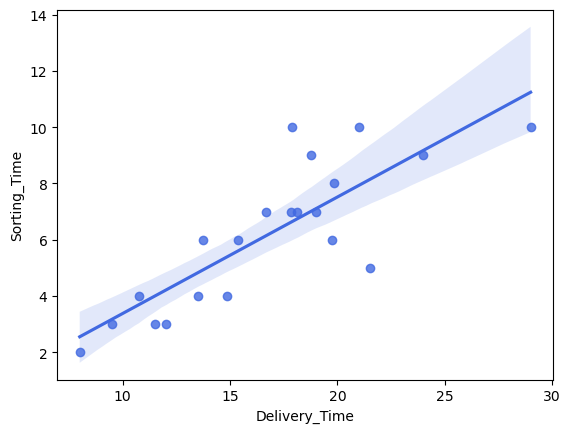

In [20]:
sns.regplot(x="Delivery_Time",y="Sorting_Time",data=data,color="royalblue")

In [21]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


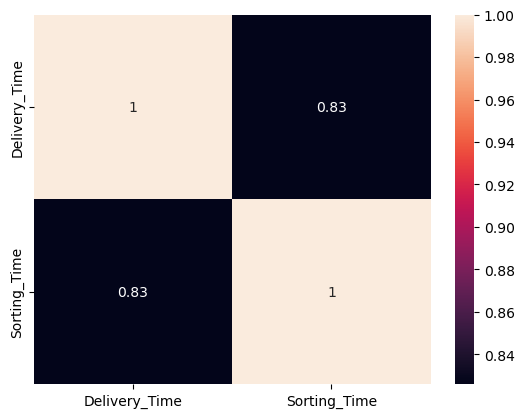

In [22]:
sns.heatmap(data.corr(), annot=True)
plt.show()

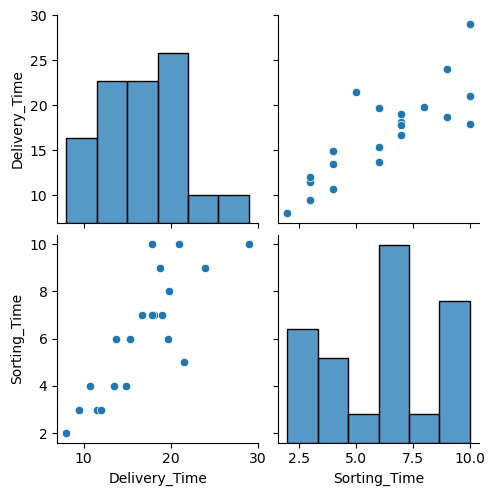

In [23]:
sns.pairplot(data)

In [24]:
X= data["Delivery_Time"].values.reshape(-1,1)
y= data["Sorting_Time"].values.reshape(-1,1)

In [25]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
X_train

array([[19.83],
       [12.03],
       [ 8.  ],
       [19.  ],
       [17.83],
       [29.  ],
       [19.75],
       [15.35],
       [13.75],
       [18.75],
       [ 9.5 ],
       [18.11],
       [24.  ],
       [21.  ],
       [14.88],
       [16.68]])

In [27]:
y_train

array([[ 8],
       [ 3],
       [ 2],
       [ 7],
       [ 7],
       [10],
       [ 6],
       [ 6],
       [ 6],
       [ 9],
       [ 3],
       [ 7],
       [ 9],
       [10],
       [ 4],
       [ 7]], dtype=int64)

In [28]:
X_test

array([[17.9 ],
       [11.5 ],
       [21.5 ],
       [13.5 ],
       [10.75]])

In [29]:
y_test

array([[10],
       [ 3],
       [ 5],
       [ 4],
       [ 4]], dtype=int64)

In [30]:
(X_train.shape),(X_test.shape)

((16, 1), (5, 1))

In [31]:
(y_train.shape),(y_test.shape)

((16, 1), (5, 1))

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()
print(model)

LinearRegression()


In [34]:
train_model = model.fit(X_train,y_train)
print("Model training is completed")
print(train_model)

Model training is completed
LinearRegression()


In [35]:
print("Coefficient or slope",model.coef_)
print("Intercept",model.intercept_)

Coefficient or slope [[0.42391171]]
Intercept [-0.85115888]


In [36]:
x1=2.0    #y=mx+b
y=[0.42391171] + [-0.85115888]
print("Salary with {} yrs of experience is {}".format(x1,y))

Salary with 2.0 yrs of experience is [0.42391171, -0.85115888]


In [37]:
y_pred=train_model.predict(X_test)
y_pred

array([[6.73686067],
       [4.02382575],
       [8.26294281],
       [4.87164916],
       [3.70589197]])

In [38]:
mse = mean_squared_error(y_test,y_pred)
mae= mean_absolute_error(y_test,y_pred)
print('mean squared error :',mse)
print('mean absolute_error:',mae)

mean squared error : 4.637873006804294
mean absolute_error: 1.743133016118426


In [39]:
r2_score(y_test,y_pred)

0.24709853785644575

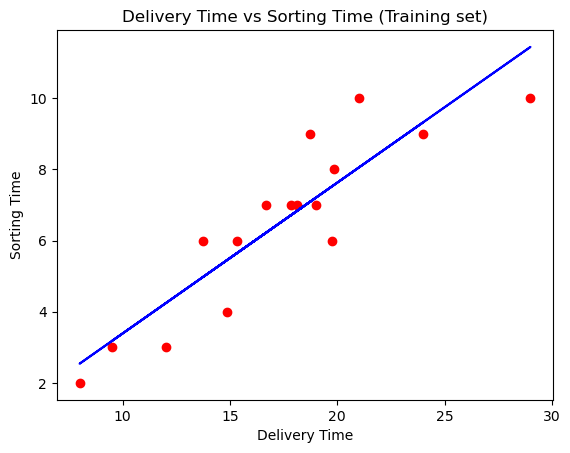

In [40]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title("Delivery Time vs Sorting Time (Training set)") 
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.show()

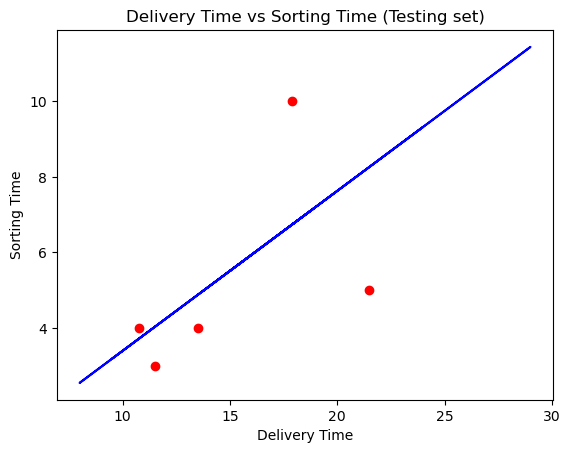

In [41]:
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title("Delivery Time vs Sorting Time (Testing set)")
plt.xlabel("Delivery Time") 
plt.ylabel("Sorting Time") 
plt.show()